In [1]:
from google.colab import drive
drive.mount("mnt")

Drive already mounted at mnt; to attempt to forcibly remount, call drive.mount("mnt", force_remount=True).


In [2]:
%cd "mnt/My Drive/LSTM"

/content/mnt/My Drive/LSTM


In [3]:
import numpy as np
from numpy import sin, cos
import scipy.integrate as integrate
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [4]:
def gen_array(dataset):
    X, Y = [], []
    for i in range(np.size(dataset) - 2):
        X.append(dataset[i])
        Y.append(dataset[i+1])
    return np.array(X), np.array(Y)

In [5]:
m = 1
L = 1
g = 9.81
theta1_0 = np.pi/2
state = (theta1_0, 0)
dt = 0.01
t = np.arange(0.0, 100 , dt)

def deriv(state, t):
    theta_dot_1 = state[1]
    theta_dot_2 = - g/L*np.sin(state[0])
    return theta_dot_1, theta_dot_2

theta = integrate.odeint(deriv, state, t)[:, 0]

In [6]:
data = np.transpose([theta]).astype('float32')
# normalize
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)
# lookback
trainX, trainY = gen_array(data)
# reshape
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))

In [7]:
model = Sequential()
model.add(LSTM(8, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.keras.metrics.MeanSquaredError()])
history = model.fit(trainX, trainY, validation_split=0.33, epochs=30, batch_size=1, verbose=2, validation_steps=30)

Epoch 1/30
6698/6698 - 22s - loss: 0.0088 - mean_squared_error: 0.0368 - val_loss: 4.3506e-05 - val_mean_squared_error: 0.0088
Epoch 2/30
6698/6698 - 6s - loss: 1.2786e-04 - mean_squared_error: 0.0061 - val_loss: 1.0025e-04 - val_mean_squared_error: 0.0044
Epoch 3/30
6698/6698 - 6s - loss: 1.2666e-04 - mean_squared_error: 0.0036 - val_loss: 1.7913e-05 - val_mean_squared_error: 0.0030
Epoch 4/30
6698/6698 - 6s - loss: 1.2738e-04 - mean_squared_error: 0.0026 - val_loss: 6.3957e-05 - val_mean_squared_error: 0.0023
Epoch 5/30
6698/6698 - 6s - loss: 1.2755e-04 - mean_squared_error: 0.0020 - val_loss: 1.3309e-04 - val_mean_squared_error: 0.0018
Epoch 6/30
6698/6698 - 6s - loss: 1.2738e-04 - mean_squared_error: 0.0017 - val_loss: 6.4013e-06 - val_mean_squared_error: 0.0016
Epoch 7/30
6698/6698 - 6s - loss: 1.2475e-04 - mean_squared_error: 0.0015 - val_loss: 9.5521e-05 - val_mean_squared_error: 0.0014
Epoch 8/30
6698/6698 - 6s - loss: 1.2486e-04 - mean_squared_error: 0.0013 - val_loss: 7.1706e

In [8]:
print(history.history.keys())

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [9]:
acc = history.history['mean_squared_error']
val_acc = history.history['val_mean_squared_error']
loss = history.history['loss']
val_loss = history.history['val_loss']

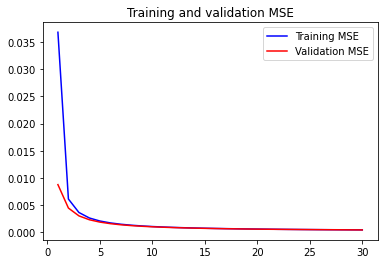

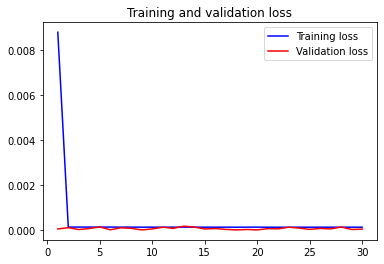

In [10]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training MSE')
plt.plot(epochs, val_acc, 'r', label='Validation MSE')
plt.title('Training and validation MSE')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
!mkdir -p saved_model_single
model.save("/content/mnt/My Drive/LSTM/saved_model_single") 

INFO:tensorflow:Assets written to: /content/mnt/My Drive/LSTM/saved_model_single/assets


INFO:tensorflow:Assets written to: /content/mnt/My Drive/LSTM/saved_model_single/assets


In [26]:
new_theta1_0 = np.pi/3
new_state = (new_theta1_0, 0)
new_t = np.arange(0, 200 , dt)

def deriv(state, t):
    theta_dot_1 = state[1]
    theta_dot_2 = - g/L*np.sin(state[0])
    return theta_dot_1, theta_dot_2

new_theta = integrate.odeint(deriv, new_state, new_t)[:, 0]

In [27]:
new_data = np.transpose([new_theta]).astype('float32')
# normalize
new_data = scaler.fit_transform(new_data)
# lookback
new_trainX, new_trainY = gen_array(new_data)
# reshape
new_trainX = np.reshape(new_trainX, (new_trainX.shape[0], 1, new_trainX.shape[1]))

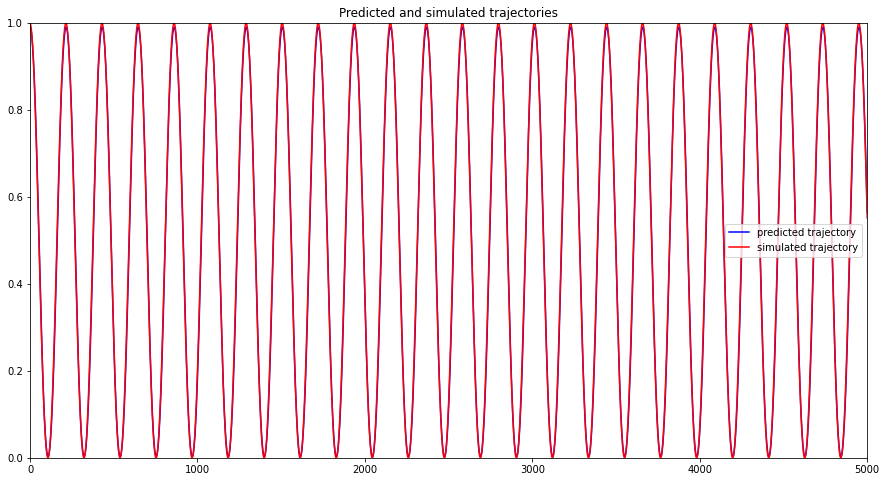

In [29]:
prediction = model.predict(new_trainX)

ax = plt.subplot(1,1,1)
ax.set_xlim(0,5000)
ax.set_ylim(0,1)
plt.plot(prediction, 'b', label='predicted trajectory')
plt.plot(new_trainY, 'r', label='simulated trajectory')
plt.title('Predicted and simulated trajectories')
plt.legend()

fig = ax.figure
fig.set_figwidth(15)
fig.set_figheight(8)
plt.show()